# A Short Tutorial on Machine Learning

### The goal of this tutorial is to present some of the key concepts from the field of machine learning.  A short real-life classification example is worked at the end.


#### *What is machine learning?* 

In a few words, it is the process of training/fitting models based on data. 

#### *Why would one use machine learning?*

To make predictions about new data in cases where "physical" theories are either computationally expensive or non-existent.

#### *A few real life examples of using machine learning*:
* Make predictions of what someone wants to watch next given their previous Netflix history
* Classify images of cats vs. dogs
* Determine the power to deliver to a robots motors based on previous data of the robots movements


## Central Ideas

#### Supervised and Unsupervised Machine Learning
Although at it's core machine learning is simply choosing models based on data, there are two broad classes of machine learning:

* Supervised Learning: These are algorithms in which we know the labels of the data.  For example, we already know the difference between cats and dogs, and we can use those known labels to help train an algorithm to tell dog pictures apart from cat pictures.  Can you think of an example from astro/physics where you might use a supervised learning algorithm?
* Unsupervised Learning: These are algorithms in which we don't know the labels of the data.  For example, if I have a million pictures of dogs, I might want to know if there are multiple subspecies in the pictures.  I'm not super familiar with every breed of dog, so I wouldn't even know all the labels to apply, nor could I look though all million pictures.

#### Machine Learning Applications

We can use machine learning to address these classes of problems (non-exhaustive list):
* Regression: Fitting lines or funcions  
* Classification: Choose labels for data
* Clustering: Find clusters in the data

*Can you think of an example of where you would use each one of these in a science context?*

#### Machine Learning in GW Astrophysics
* Find glitches (i.e. weird non-linear noise) in the data
* Classify different glitches
* Find gravitational waves in the data
* Fit general relativity based on a limited number of simulations
* Make predictions about the rates and types of black hole or neutron star mergers
* More!

#### The Likelihood

A key quantity in the machine learning and in statistics generally is the *likelihood* $\mathcal{L}(\vec{x}|m)$.  

The likelihood is the probability of getting data $\vec{x}$ given that model $m$ is true. (The vertical bar represents the word 'given'. $p(A|B)$ typically denotes the *conditional* probability of $A$ being true given that $B$ is true)

For example, suppose I notice that it is raining outside. One possible model to explain this is that there are clouds in the sky.  Under this model, the likelihood $\mathcal{L}({\rm rain}|{\rm cloudy})$ is quite high: it's likely that I would see rain if it is cloudy.  On the other hand, the model for which we have clear skies is much less likely to produce rain, and hence has a lower likelihood.

Given the definition of the likelihood above, there's an interesting quantity we can immediately write down: The likelihood ratio:
$$\mathcal{L}_j^i = \frac{\mathcal{L}(\vec{x}|m_i)}{\mathcal{L}(\vec{x}|m_i)}$$
It just tells us how much more likely we are to get the data under model $m_i$ than under model $m_j$.  

For clarification, the likelihood ratio is *not* the same as how much more likely $m_i$ is to be true than $m_j$, but it is related. If we wanted to compute how much more likey $m_i$ is than $m_j$, we'd need to multiply the likelihood ratio by $p(m_i)/p(m_j)$, the probability of $m_i$ over the probability of $m_j$.  

#### Cost
Central to machine learning is the concept of cost.  We want our algorithm to minimize the cost of its predictions.  The algorithm should give accurate results, but it should also not be too expensive to run.  A cost function can be chosen to decide when the algorithm is optimized.  The *score* is the derivative of the cost. 

#### Training, Validation, Test
As noted before, machine learning is about choosing models based on data.  But of course, the model may be imperfect and we want to know how well it's doing.  To assess the fidelity of these algorithms, the data at hand is typically broken into three sets: *training, validation, and test*.  
* The training data is used to fit the machine learning model
* The model is then applied to the validation set to see how well it did.  Updates to the model can be made if needed (for example adding more complexity).
* After all tuning is done, the model is finally applied to the test set to give a final evaluation of the model.  

#### Underfitting, Overfitting
Fits to the data can often be either too simple, thus missing out on important variance in the data, or it can be overly complex, fitting the previous data perfectly, but now wildly inaccurate for new data.  These are known as *underfitting* and *overfitting*.  The classic example is in trying to regress a 1D function based on, say, 10 data points.  If you try to fit this with an order 1 polynomial, you might miss out on important squiggles in the function.  On the other hand, if you use a 20-th order polynomial, you'll get very squiggly, high variance behavior in your fitted function that connects the data points but has features that aren't really being informed by the data.

#### Receiver Operating Characteristic (ROC) Curves
An ROC curve is a plot of the true positive rate of a classifier vs. the false positive rate as the classifier's theshold is changed.  

## Snaps and Claps: A Classification Example

In this example, our goal is to design a machine learning algorithm to classify snippets of audio as either snaps or claps.  First let's import some packages:

In [109]:
import filters
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.io import wavfile
import numpy as np
import glob
from __future__ import print_function


Now we'll read in the audio data, and use some of the techniques from Lecture 3 to plot the fourier transform of each audio clip. 

['audio/claps0.wav', 'audio/claps1.wav', 'audio/claps2.wav', 'audio/claps3.wav', 'audio/claps4.wav', 'audio/claps5.wav', 'audio/claps6.wav', 'audio/claps7.wav', 'audio/claps8.wav', 'audio/claps9.wav', 'audio/snaps0.wav', 'audio/snaps1.wav', 'audio/snaps10.wav', 'audio/snaps2.wav', 'audio/snaps3.wav', 'audio/snaps4.wav', 'audio/snaps5.wav', 'audio/snaps6.wav', 'audio/snaps7.wav', 'audio/snaps8.wav', 'audio/snaps9.wav']


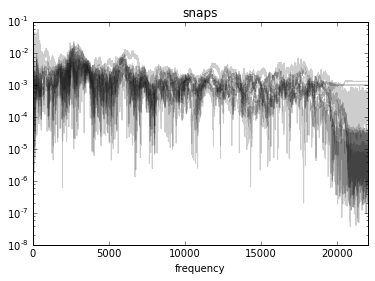

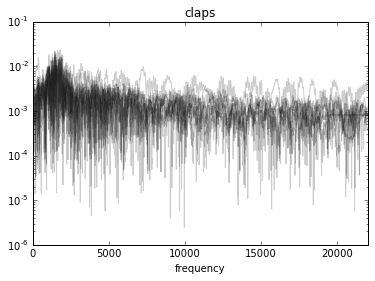

In [32]:
audiodir = 'audio/'
audio_fnames = glob.glob('audio/*')
print (audio_fnames)
for s,snds in enumerate(['snaps','claps']):
    fig = plt.figure()
    ax = fig.gca()
    for i in range(9):

        # Read in the sampling rate and data
        fs, data = wavfile.read("%s%s%i.wav"%(audiodir,snds,i))
        N, ndim = data.shape

        # define a tukey window
        w = filters.tukey(N, alpha=0.3)

        f = np.fft.fftshift(np.fft.fftfreq(N, d=1./fs))
        fmax = 0.5*fs
        truth = np.abs(f)<=fmax
        for d in range(ndim):
            
            # take the fft of the windowned data
            amplitude = np.abs(np.fft.fftshift(np.fft.fft(data[:,0]*w)))[truth]
            
            # plot the amplitude normalized by square root of the total power in the signal 
            ax.plot(f[truth], amplitude/np.sqrt(np.sum(np.square(amplitude))), alpha=0.1,color='k')

        ax.set_xlabel('frequency')
        ax.set_yscale('log')
        #ax.set_xscale('log')
        ax.set_xlim(xmin=0, xmax=fmax)
    ax.set_title(snds)


#### Visually inspect the fourier representations of the audio clips.  
* Are there commonalities among all the snaps?  All the claps?  Are there distinguishing *features* between the snap and clap? 
* Do we need every point on each spectrum in order to tell snaps apart from claps?  Or can we ignore or aggregate parts of the full data for each audio clip to have a more manageable data size? 
* With a partner come up with two schemes to tell snaps apart from claps


### Feature Extraction
Clearly there are broad properties of these spectra that allow us to tell them apart.  We don't need the full spectra, we just need something like the total power a few bandpasses -- that is, just the "average" of the spectrum in a few ranges of frequency.  Let's use the techniques from Lecture 3 to bandpass the data into a few different bandpasses.

In [41]:
# Define the bandpasses we want to use as a list of tuples, each with the lower and upper roll-off frequency
bps = [(10,2500),(2500,5000),(5000,7500)]

# create array to dump the data
feature_data = np.empty([len(audio_fnames),len(bps)])
classes = []

for fi,fname in enumerate(audio_fnames):
        # Read in the sampling rate and data
        fs, data = wavfile.read(fname)
        N, ndim = data.shape

        
        # define a tukey window
        w = filters.tukey(N, alpha=0.3)

        # get the fourier transform
        f = np.fft.fftshift(np.fft.fftfreq(N, d=1./fs))
        fmax = 0.5*fs    
        amplitude = np.abs(np.fft.fftshift(np.fft.fft(data[:,0]*w)))
        
        if 'snaps' in fname:
            classes.append('snaps')
        elif 'claps' in fname:
            classes.append('claps')
        
        # apply the filters and extract the power in each bandpass
        for b,bp in enumerate(bps):
            F = np.ones(N, dtype=float)
            F *= filters.highpass(f, bp[0], m=2)
            F *= filters.lowpass(f, bp[1], m=2)
            
            feature_data[fi,b] = np.sum(np.square(amplitude*F))
        feature_data[fi,:] = feature_data[fi,:]/np.sum(feature_data[fi,:])

### Visualizing the feature data
Now that we've reduced the data to a few key features, let's make a scatter plot for each pair of features.

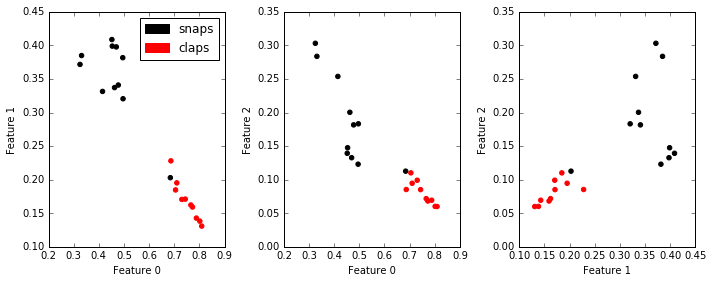

In [57]:
feature_pairs = [(0,1),(0,2),(1,2)]
fig,ax = plt.subplots(1,3,figsize=(10,4))

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

class_colors = ['k' if (cl=='snaps') else 'r' for cl in classes ]
legend_elements = [Patch(facecolor='k', edgecolor='k',
                         label='snaps'),
                   Patch(facecolor='r', edgecolor='r',
                         label='claps')
                  ]

for p,pair in enumerate(feature_pairs):
    ax[p].scatter(feature_data[:,pair[0]],feature_data[:,pair[1]],color=class_colors)
    ax[p].set_xlabel('Feature %i'%pair[0])
    ax[p].set_ylabel('Feature %i'%pair[1])
ax[0].legend(handles=legend_elements)
fig.tight_layout()

#### Looking at these features, do you think we need more?  Fewer?

### Running the Classifier
We need to split the data up into two groups: a training set, a validation set, and a test set.  One can of course do other types of validation, e.g. k-fold or leave-one-out validation if desired. 

In [60]:
import sklearn

In [62]:
# we need to divide up the data into test and validation sets
classes = np.array(classes)
snap_sel = classes == 'snaps'
clap_sel = classes == 'claps'
nsnaps = np.sum(snap_sel)
nclaps = np.sum(clap_sel)
snap_train = feature_data[snap_sel,:][:5,:]
snap_val = feature_data[snap_sel,:][5:,:]
clap_train = feature_data[clap_sel,:][:5,:]
clap_val = feature_data[clap_sel,:][5:,:]

There are a LOT of classifiers out there, but here let's use one that's pretty simple and ad-hoc:  We'll model each cluster of the data as being pulled from a normal distribution.  We'll *fit* the normal distributions to the two sets of data in the feature space, then we'll use the likelihood ratio for the two Gaussians to decide how to classify the validation set.  

#### Can you think of any other ways to classify the data?

For simplicity here, let's use normal distributions that are symmetric along each axis, so they only have four parameters we need to fit: the Gaussian's location in 3d feature space and its width.  A more sophisticated approach would be to use a full multi-dimensional Gaussian distribution with a covariance matrix and mean vector that we fit rather than just having one width parameter.  

To fit the Gaussians, we need an "objective function", ie. something to tell us when our fits are best.  A natural objective function to use here is the likelihood of the training set data $\{\vec{x}_{\rm t}\}$ given a choice of Gaussian location $\vec{\mu}$ and width $\alpha$:
$$\mathcal{L}(\{\vec{x}_{\rm t}\} | \vec{\mu},\alpha) = \prod_t {\rm det}(2 \pi \Sigma)^{-1/2}{\rm exp}\left(-\frac{1}{2}(\vec{x}_t - \vec{\mu})^\top\Sigma^{-1}(\vec{x}_t - \vec{\mu}))\right)$$
Since we've chosen a symmetric Gaussian distribution, $\Sigma$ is simply a diagonal matrix with elements $\alpha^2$.

In [83]:
# We'll use scipy.optimize to choose the optimal parameters 
# that maximize the likelihood (i.e. minimize the negative log likelihood)
from scipy.optimize import minimize

# define the normal probability density function
def symmetric_normal(x,mean,alpha):
    return (-1./2. * np.sum(np.square((x-mean))/alpha**2)) - (1./2. * np.log((2.*np.pi*(alpha*2))**3))

# define the negative log likelihood
def neg_log_likelihood(params,data):
    mu = params[:-1]
    alpha = params[-1]
    tot = 0
    for i in range(data.shape[0]):
        tot = tot - np.sum(symmetric_normal(data[i,:],mu,alpha))
    return tot


In [103]:
param_bounds = [(0.001,1) for i in range(4)]

res = minimize(neg_log_likelihood, [0.5,0.5,0.5,0.5],args=snap_train,method='L-BFGS-B',bounds=param_bounds)
print('the snap gaussian parameters are:',res['x'])
snap_params = res['x']


res = minimize(neg_log_likelihood, [0.5,0.5,0.5,0.5],args=clap_train,method='L-BFGS-B',bounds=param_bounds)
print('the clap gaussian parameters are:',res['x'])
clap_params = res['x']


the snap gaussian parameters are: [ 0.50537689  0.31802837  0.17659496  0.1008168 ]
the clap gaussian parameters are: [ 0.72358383  0.18768448  0.08873169  0.03347049]


Great, now let's classify our validation samples!  Let's just take the simplest route and classify based on whether it is more likely to have come from the snap gaussian or the clap gaussian

In [108]:
print (clap_val.shape)
print('**Classifying snaps')
for i in range(snap_val.shape[0]):
    Lsnap = symmetric_normal(snap_val[i,:],snap_params[:-1],snap_params[-1])
    Lclap = symmetric_normal(snap_val[i,:],clap_params[:-1],clap_params[-1])
    if Lsnap>Lclap:
        print('Classifying as a snap.  Correct!')
    else:
        print('Classifying as a clap.  Fail!')
        
print('**Classifying claps')
for i in range(clap_val.shape[0]):
    Lsnap = symmetric_normal(clap_val[i,:],snap_params[:-1],snap_params[-1])
    Lclap = symmetric_normal(clap_val[i,:],clap_params[:-1],clap_params[-1])
    if Lsnap>Lclap:
        print('Classifying as a snap.  Fail!')
    else:
        print('Classifying as a clap.  Correct!')
        

(5, 3)
**Classifying snaps
Classifying as a snap.  Correct!
Classifying as a snap.  Correct!
Classifying as a snap.  Correct!
Classifying as a snap.  Correct!
Classifying as a snap.  Correct!
Classifying as a snap.  Correct!
**Classifying claps
Classifying as a clap.  Correct!
Classifying as a clap.  Correct!
Classifying as a clap.  Correct!
Classifying as a clap.  Correct!
Classifying as a clap.  Correct!


#### Cool, our classifier works pretty well!  Before we go any further let's think about the following:
* What prior knowledge did we have to put in to make this classifier?  What parts did we have to tune by hand?
* What were the limitations of the classifier we used here, and how could we improve it?
* We just used one validation set here and eyeballed how many we got right with our classifier.  How would you more robustly quantify how well the method is working?

#### Optional exercise: Do a k-fold or leave-one out validation with this data set and method.  How does the method fare?

### When Thanos Snaps

In normal circumstances, it might be okay for us to accidentally misclassify a few snaps or claps. But what if we're trying to classify Thanos's snaps and claps?  If he snapped we definintely do not want to be wrong about it (*spoiler: we want to know if half our friends are dead*), and we'd much rather think a clap is a snap than a snap is a clap. So, we would want to put a lower theshold on likelihood $\mathcal{L}_{\rm clap}^{\rm snap}$ to make our classification.  

In the gravitational-waves context, we have lots of glitches in our detectors that could be mistaken for real gravitational waves.  If we want a machine learning algorithm to cut out times in the strain data where we think there is a glitch, we want to be pretty darn sure that data came from a glitch before throwing it out.

#### Exercise: Lower the threshold of the likelihood ratio.  As you do that, how many false positives do you get?  If possible, make an ROC curve.